# Challenge 1

## SciPy Tutorial
Pertinent information about [SciPy](https://docs.scipy.org/) and NumPy is available in the [SciPy Tutorial](https://docs.scipy.org/doc/scipy/reference/tutorial/index.html).
 * Read [Introduction](https://docs.scipy.org/doc/scipy/reference/tutorial/general.html)
 * Read [Basic functions](https://docs.scipy.org/doc/scipy/reference/tutorial/basic.html)
 * Read [Optimization](https://docs.scipy.org/doc/scipy/reference/tutorial/optimize.html)
 
Consider the function defined below.
 * Plot the function using [matplotlib](https://matplotlib.org/)

In [1]:
import numpy as np
import matplotlib.pyplot as plt

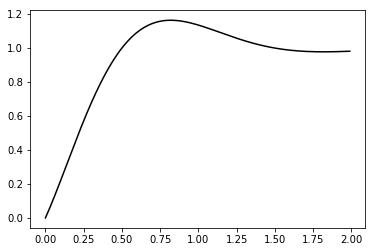

In [2]:
def g(t):
    return 1 - (np.exp(-2*t) * np.cos(np.pi*t))

t1 = np.arange(0.0, 2.0, 0.01)

plt.figure(1)
plt.plot(t1, g(t1), 'k')
plt.show()

Consider the class of functions of the form $f(t) = 1 - e^{-at}$ where $a$ is a free parameter.
 * Find the value of $a$ that minimizes the $L_2$ norm between $g(t)$ and $f(t)$ over the interval $[0, 2]$
 * Computer the residual mean squared error
 * Explain how you obtained $a$

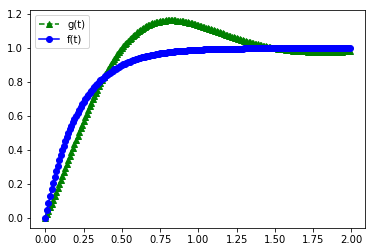

Value for a is 4.6  which the minimized L2 norm is 1.50454026637
Residual mean squared error is 0.0113182070656


In [2]:
import numpy as np
import matplotlib.pyplot as plt

def g(t):
    return 1 - (np.exp(-2*t) * np.cos(np.pi*t))
def f(t, a):
    return 1 - (np.exp(-1*a*t))

t1 = np.arange(0.0, 2.0, 0.01)
for guessA in np.arange(0.0, 10.0, 0.01):
    l2norm = np.sqrt( sum( (g(t1)-f(t1, guessA))**2 ) )
    dec = np.sqrt( sum( (g(t1)-f(t1, guessA-0.01))**2 ) )
    inc = np.sqrt( sum( (g(t1)-f(t1, guessA+0.01))**2 ) )
    if ((l2norm < dec) and (l2norm < inc)):
        a_minL = guessA
        
l2norm = np.sqrt( sum( (g(t1)-f(t1, a_minL))**2 ) )
rms = sum( (g(t1)-f(t1, a_minL))**2 ) / len(t1)

t1 = np.arange(0.0, 2.0, 0.01)
plt.figure(1)
plt.plot(t1, g(t1), 'g--^', label = 'g(t)')
plt.plot(t1, f(t1, a_minL), 'b-o', label = 'f(t)')
plt.legend()
plt.show()
print("Value for a is", a_minL, " which the minimized L2 norm is", l2norm)
print("Residual mean squared error is", rms)

In order to get my value 'a' which L2 norm is minimized, I set a variable 'guassA' that is given from range 0 to 10 with steps 0.01 and put every guessA back to the L2 norm equation. The current point that put guessA into the equaion is stored in 'l2norm', 'dec' is the left point that put a step before guessA into equation, and 'inc' is the right point that put a step further of guessA into equation.
Since the L2 norm is minimized, we know that left point of it and right point of it should be greater than the minimum point, so I compare the 'l2norm' with 'dec' and 'inc'. When l2norm is both smaller than left and right point, I find the minimum point which the current guessA is the value of 'a' we want to find.